# EDA - Market Simulation under Rikiddo Scoring Rule

This file will present statistical and graphical analyzes of the simulated model for the Rikiddo Scoring Rule. It is important to clarify that these data are preliminary and that its performance will be improved as it is exposed to new markets.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
simulationRecord = pd.read_csv('simulationRecord.csv')
simulationRecord.head()

,Unnamed: 0,transactionNumber,account_Will,account_Will_not,account_Will_pool,account_Will_not_pool,totalVolume,totalPoolVolume,totalFee,whoBuy,ratioVolume,z,order,transactCost,previousCost,deltaQ,costPerUnit,r,profitCumSum
0,0,0,1000000.000000,1000000.000000,0.000000,0.000000,2.000000e+06,0.000000,0.028854,Initial,1.000000,0.00000,Initial,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00
1,0,0,1000000.000000,997457.698789,0.000000,2542.301211,1.997458e+06,2542.301211,0.028854,['Will_not'],0.000000,0.00000,buy,NaN,0.000000,2542.301211,NaN,0.000000,NaN
2,0,1,1000000.000000,995166.374932,0.000000,4833.625068,1.995166e+06,4833.625068,0.032634,['Will_not'],1.000000,0.00378,buy,NaN,NaN,2291.323857,NaN,1.000000,NaN
3,0,2,999234.792923,995166.374932,765.207077,4833.625068,1.994401e+06,5598.832145,0.032634,['Will'],1.000000,0.00378,buy,9.922587e-10,4833.625068,765.207077,1.296719e-12,1.000000,9.922587e-10
4,0,3,997748.487662,995166.374932,2251.512338,4833.625068,1.992915e+06,7085.137406,0.034614,['Will'],1.725956,0.00576,['buy'],3.168791e-04,4833.625068,1486.305261,2.131992e-07,1.725956,3.168801e-04


In [168]:
print(f'This simulation has {simulationRecord.shape[0]} successful transactions.')

This simulation has 1711 successful transactions.


An important thing to clarify is that there were a lot of transactions that weren't successful because different factors established into the simulation (for example, traders not accepting the fee). After getting a general overview of the dataset, we will analyze the behaviour of the market. First, we'll start with descriptive statistics

In [140]:
descriptiveStats= simulationRecord[['totalFee', 'ratioVolume', 'z', 'transactCost', 'previousCost', 'costPerUnit', 'deltaQ']].describe()
descriptiveStats

,totalFee,ratioVolume,z,transactCost,previousCost,costPerUnit,deltaQ
count,1711.000000,1711.000000,1711.000000,1.709000e+03,1710.000000,1.709000e+03,1711.000000
mean,0.032641,1.005428,0.003787,1.513258e+01,27952.101820,1.174437e-02,1515.504678
std,0.000362,0.109809,0.000362,1.170867e+03,11350.100526,6.836938e-01,865.354423
min,0.028854,0.000000,0.000000,-2.962775e+03,0.000000,-3.431051e+00,0.000000
25%,0.032516,0.964090,0.003662,-1.041403e+02,22021.559113,-2.213247e-01,782.895924
50%,0.032635,1.000451,0.003781,2.546585e-11,28979.491231,3.967992e-14,1535.075128
75%,0.032754,1.037546,0.003900,2.044111e+02,34509.257510,4.335617e-01,2260.435598
max,0.034724,1.775953,0.005870,2.996268e+03,58254.131586,1.810153e+00,2996.269551


In [143]:
for col in descriptiveStats.columns:
    maxGap = (descriptiveStats.loc['max',col]-descriptiveStats.loc['min',col])
    iqGap = (descriptiveStats.loc['75%',col]-descriptiveStats.loc['25%',col])

    print(f'The maximum gap of {col} is {maxGap}, and the interquartile range is {iqGap}')

The maximum gap of totalFee is 0.0058698333623841, and the interquartile range is 0.00023817932567310462
The maximum gap of ratioVolume is 1.7759528321751947, and the interquartile range is 0.07345595422273865
The maximum gap of z is 0.005869833362384, and the interquartile range is 0.00023817932567304998
The maximum gap of transactCost is 5959.043158598724, and the interquartile range is 308.55138200810325
The maximum gap of previousCost is 58254.1315855772, and the interquartile range is 12487.698397307922
The maximum gap of costPerUnit is 5.241203497886401, and the interquartile range is 0.6548864080197845
The maximum gap of deltaQ is 2996.269550617818, and the interquartile range is 1477.5396743566325


For most cases (except for deltaQ, which corresponds to the amount willing to buy or sell per iteration), we find an interquartile range considerably lower than the total range of each field. This indicates that, although there are outliers, **the model has managed to keep the results within a limited range**.

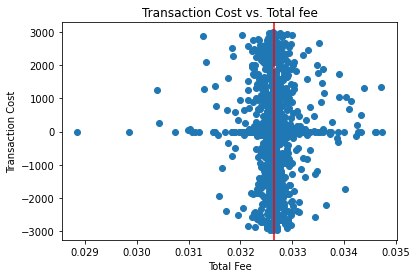

In [144]:
plt.scatter(simulationRecord['totalFee'], simulationRecord['transactCost'])
plt.axvline(simulationRecord['totalFee'].mean(), color='r', linestyle='-')
plt.title('Transaction Cost vs. Total fee')
plt.xlabel('Total Fee')
plt.ylabel('Transaction Cost')
plt.show()

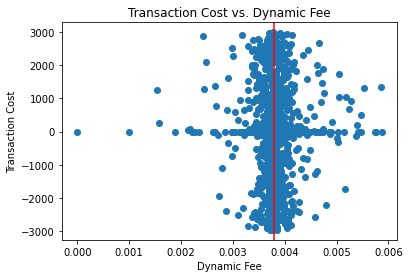

In [145]:
plt.scatter(simulationRecord['z'], simulationRecord['transactCost'])
plt.axvline(simulationRecord['z'].mean(), color='r', linestyle='-')
plt.title('Transaction Cost vs. Dynamic Fee')
plt.xlabel('Dynamic Fee')
plt.ylabel('Transaction Cost')
plt.show()

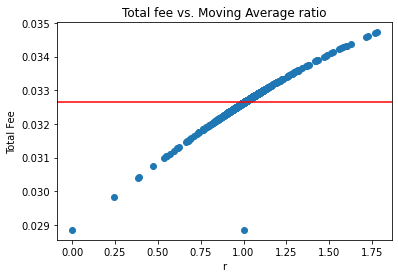

In [146]:
plt.scatter(simulationRecord['r'], simulationRecord['totalFee'])
plt.axhline(simulationRecord['totalFee'].mean(), color='r', linestyle='-')
plt.title('Total fee vs. Moving Average ratio')
plt.xlabel('r')
plt.ylabel('Total Fee')
plt.show()

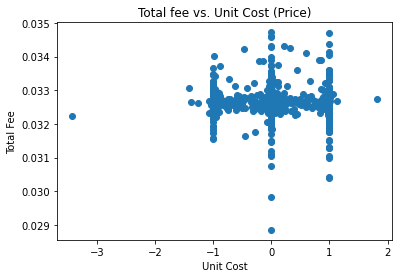

In [166]:
plt.scatter(simulationRecord['costPerUnit'], simulationRecord['totalFee'])
plt.title('Total fee vs. Unit Cost (Price)')
plt.xlabel('Unit Cost')
plt.ylabel('Total Fee')
plt.show()

As we can see, the market still has imperfections, noting the observations that are outside the [-1,1] interval. This is something that using the model for a longer period can correct.

In [160]:
medNegTx = simulationRecord[simulationRecord['transactCost']<0]['transactCost'].median()
medPosTx = simulationRecord[simulationRecord['transactCost']>=0]['transactCost'].median()
medNegTxUnit = simulationRecord[simulationRecord['costPerUnit']<0]['costPerUnit'].median()
medPosTxUnit = simulationRecord[simulationRecord['costPerUnit']>=0]['costPerUnit'].median()
print(f'Transaction Cost for sellers (Median): {medNegTx}')
print(f'Transaction Cost for buyers (Median): {medPosTx}')
print(f'Price paid for sellers (Median): {medNegTxUnit}')
print(f'Price paid for buyers (Median): {medPosTxUnit}')


Transaction Cost for sellers (Median): -123.34015898279176
Transaction Cost for buyers (Median): 180.26199556036045
Price paid for sellers (Median): -0.2902955407249031
Price paid for buyers (Median): 0.32458666679174486


In [167]:
negatives = simulationRecord[simulationRecord['transactCost']<0].reset_index(drop=True).shape[0]
nonnegatives = simulationRecord[simulationRecord['transactCost']>=0].reset_index(drop=True).shape[0]
netresult = simulationRecord['transactCost'].sum()
netUnitResult = simulationRecord['costPerUnit'].sum()

print(f'Amount of transactions with negative Cost: {negatives}')
print(f'Amount of transactions with non-negative Cost: {nonnegatives}')
print(f'Net result of the market: {netresult}')
print(f'Net result of the market (measured by unit): {netUnitResult}')

Amount of transactions with negative Cost: 839
Amount of transactions with non-negative Cost: 870
Net result of the market: 25861.572337311216
Net result of the market (measured by unit): 20.07113653782647


Through these last calculations, we can observe that the final result of the market is positive, which represents an attractive indicator for individuals interested in becoming Liquidity Providers of the market or of the platform.